<a href="https://colab.research.google.com/github/Misha-private/Demo-repo/blob/main/PyTochNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NN with pytorch

In [20]:
#
# Impport required libraries
#
import torch
import pandas as pd
import numpy as np

import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [21]:
#
# Load and prepare the data
#
from google.colab import drive
#drive.mount('/content/drive')

fitbit_df = pd.read_csv("/content/drive/My Drive/TestData/dailyActivity_merged 2.csv")
#fitbit_df = pd.read_csv("dailyActivity_merged.csv
# Displays first 5 row of the csv file
fitbit_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [22]:
#
#  Limit number of features
#
features = [ 'TotalSteps', 'TotalDistance','VeryActiveDistance', 'ModeratelyActiveDistance','VeryActiveMinutes', 'FairlyActiveMinutes','Calories']
fitbit_df = fitbit_df[features]

# All the feature value must be numerical. Network doesn't process non-numerical data.
fitbit_df.head()

,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,Calories
0,13162,8.50,1.88,0.55,25,13,1985
1,10735,6.97,1.57,0.69,21,19,1797
2,10460,6.74,2.44,0.40,30,11,1776
3,9762,6.28,2.14,1.26,29,34,1745
4,12669,8.16,2.71,0.41,36,10,1863


In [23]:
#
# Split data in input (X) and output (Y)
# Convert both variables into PyTorch tensors
#
X = torch.tensor(fitbit_df.drop(columns=["Calories"], axis=1).to_numpy(), dtype=torch.float)
y = torch.tensor(fitbit_df["Calories"].to_numpy(), dtype=torch.long)

# Verify X, y value
print("Input tensors: ", X[:5], "\n")
print("Output tensors: ", y[:5], "\n\n")

print("Shape of input tensor: ", X.shape)
print("Shape of ouput tensor: ", y.shape)

Input tensors:  tensor([[1.3162e+04, 8.5000e+00, 1.8800e+00, 5.5000e-01, 2.5000e+01, 1.3000e+01],
        [1.0735e+04, 6.9700e+00, 1.5700e+00, 6.9000e-01, 2.1000e+01, 1.9000e+01],
        [1.0460e+04, 6.7400e+00, 2.4400e+00, 4.0000e-01, 3.0000e+01, 1.1000e+01],
        [9.7620e+03, 6.2800e+00, 2.1400e+00, 1.2600e+00, 2.9000e+01, 3.4000e+01],
        [1.2669e+04, 8.1600e+00, 2.7100e+00, 4.1000e-01, 3.6000e+01, 1.0000e+01]]) 

Output tensors:  tensor([1985, 1797, 1776, 1745, 1863]) 


Shape of input tensor:  torch.Size([940, 6])
Shape of ouput tensor:  torch.Size([940])


In [24]:
#
# Split dataset into: train -80/%, validation -10%, test -10%
# (use sklearn.model_selection)

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_eval, y_eval, test_size=0.5, random_state=42)

# Shape of dataset before split

print("Shape of input tensor: ", X.shape)
print("Shape of ouput tensor: ", y.shape, "\n")

# Shape of train, val, and test dataset after split. The sum total is same as original dataset.
# And each dataset still has 6 features which is the expected result

print("Train input: ", X_train.shape, "Train output: ", y_train.shape)
print("Val input: ", X_val.shape, "Val output: ", y_val.shape)
print("Test input: ", X_test.shape, "Test output: ", y_test.shape)

Shape of input tensor:  torch.Size([940, 6])
Shape of ouput tensor:  torch.Size([940]) 

Train input:  torch.Size([752, 6]) Train output:  torch.Size([752])
Val input:  torch.Size([94, 6]) Val output:  torch.Size([94])
Test input:  torch.Size([94, 6]) Test output:  torch.Size([94])


In [25]:
#
# Feature normalization
# (Use mean and standard deviation)
# Calculate mean
mean_train = X_train.mean(dim=0)
mean_val = X_val.mean(dim=0)
mean_test = X_test.mean(dim=0)

# Calculate standard deviation
std_train = X_train.std(dim=0)
std_val = X_val.std(dim=0)
std_test = X_test.std(dim=0)

# apply mean and std to the input dataset
X_train = (X_train - mean_train)/ std_train
X_val = (X_val - mean_val)/ std_val
X_test = (X_test - mean_test)/ std_test

print("Normalized X_train: ", X_train[:5], "\n")
print("Normalized X_val: ",X_val[:5], "\n")
print("Normalized X_train: ",X_test[:5], "\n")

Normalized X_train:  tensor([[-0.7593, -0.6997, -0.5467, -0.3020, -0.6219, -0.3347],
        [ 2.0021,  2.6591,  3.1946, -0.3020,  1.3290, -0.2848],
        [-1.4722, -1.3729, -0.5720, -0.6559, -0.6519, -0.6840],
        [ 0.3837,  0.4537, -0.0732, -0.4618, -0.1117, -0.4345],
        [ 0.0981,  0.2161, -0.3226,  1.6382, -0.3818,  1.4617]]) 

Normalized X_val:  tensor([[ 0.1610,  0.0433, -0.4913, -0.2763, -0.5920, -0.1751],
        [ 0.8919,  0.8510,  1.2233,  0.8606,  0.7055,  0.9937],
        [ 0.4630,  0.5132,  0.6823,  0.2816,  3.1563,  1.2372],
        [ 0.8296,  0.6422,  1.4158,  0.3027,  1.9309,  1.0424],
        [-1.0902, -0.9855, -0.4913, -0.5078, -0.5920, -0.5647]]) 

Normalized X_train:  tensor([[ 0.2477,  0.1251, -0.5565,  0.3802, -0.5782,  0.3463],
        [ 0.9586,  1.1760,  1.6955, -0.0067,  2.7202, -0.1255],
        [ 0.1309, -0.0063,  0.1472,  0.4598,  0.0458,  0.0842],
        [ 1.0478,  0.8070,  0.5695, -0.4049,  0.4916, -0.3351],
        [-0.4628, -0.4004, -0.6081, -

In [26]:
#
# Create TensorDataset - PyTorch feature - for each (input,output) pair of
# train, validation and test tensors data.
#
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

# show how train_dataset looks like
print(train_dataset[0])

(tensor([-0.7593, -0.6997, -0.5467, -0.3020, -0.6219, -0.3347]), tensor(2580))


In [27]:
#
# Apply DataLoader for each dataset
# This function allows to select batches of data that will be train together
# (One by one would be impractical as well as training all at once)
# batch_size is 10.shuffle=True (shuffle data to make trainging better)
# Creating dataloader for each train, val and test dataset

train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset.tensors[0]), shuffle=False, drop_last=True)

# showing first batch of train_loader
for X, y in train_loader:
  print("Shape of first batch of train_loader input : ", X.shape)
  print("Shape of first batch of train_loader output : ", y.shape)
  break

Shape of first batch of train_loader input :  torch.Size([10, 6])
Shape of first batch of train_loader output :  torch.Size([10])



# Define the model


* **layer1** takes **in_feature** values from input data.

Its dimension should be total number of features, here 6

**in_features = X_train.shape[1]**

*   **layer1** has 64 nodes. It is followed by activation function (or layer), here ReLU

* **layer2** has 64 nodes, followed by activation layer

* **layer3** has 32 nodes, followed by activation layer3

* The output hase 1 node


In [47]:
class fitbit_model(nn.Module):
  def __init__(self, input_features, output_class):
    super(fitbit_model, self).__init__()
    self.layer1 = nn.Linear(in_features=input_features, out_features=64)
    self.activation1 = nn.ReLU()
    self.layer2 = nn.Linear(in_features=64, out_features=64)
    self.activation2 = nn.ReLU()
    self.layer3 = nn.Linear(in_features=64, out_features=32)
    self.activation3 = nn.ReLU()
    self.output = nn.Linear(in_features=32, out_features=output_class)

  def forward(self, x):
    x = self.activation1(self.layer1(x))
    x = self.activation2(self.layer2(x))
    x = self.activation3(self.layer3(x))
    return self.output(x)


super(fitbit_model, self).__init__(), this is a parent class nn.Module constructor, is called to bootstrap fitbit_model model.

Initialize model by providing input features value and output clase value to the fitbit-model constructor

In [48]:
input_features = X_train.shape[1]
output_class = 1
model = fitbit_model(input_features, output_class)

print("Model Schema\n")
print(model)

print("\nModel initial weights values for layer1")
print(model.layer1.weight[:2])
print("Weight shape on layer1: ", model.layer1.weight.shape)

print("\nModel initial bias values for layer1")
print(model.layer1.bias[:2])
print("Bias shape on layer1: ", model.layer1.bias.shape)

Model Schema

fitbit_model(
  (layer1): Linear(in_features=6, out_features=64, bias=True)
  (activation1): ReLU()
  (layer2): Linear(in_features=64, out_features=64, bias=True)
  (activation2): ReLU()
  (layer3): Linear(in_features=64, out_features=32, bias=True)
  (activation3): ReLU()
  (output): Linear(in_features=32, out_features=1, bias=True)
)

Model initial weights values for layer1
tensor([[-0.3206, -0.2376,  0.3182,  0.0840, -0.1620, -0.1939],
        [-0.0149, -0.0343, -0.2343,  0.1356,  0.3212,  0.3612]],
       grad_fn=<SliceBackward0>)
Weight shape on layer1:  torch.Size([64, 6])

Model initial bias values for layer1
tensor([-0.2279, -0.2921], grad_fn=<SliceBackward0>)
Bias shape on layer1:  torch.Size([64])


# Train and evaluate the model
Define *loss function*, *optimizer*, total number of *epochs* and other variables

In [49]:
# Loss function and optimizer
loss_fn = nn.HuberLoss(delta=0.5)
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# collecting metrics
train_losses = []
val_losses = []

# Total number of epochs
n_epochs = 100

**loss_fn = nn.HuberLoss(delta=0.5)**: Huber Loss is a loss function used in robust regression. It is a combination of both MSE and MAE.
delta is the hyperparameter to define the range for MAE and MSE and the value is changed based on the task.

**optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)**: Adam is one of the most commonly used optimization algorithms that hold the current state and will update the parameters based on the computed gradients. It take [(model.parameters) — learnable parameters (W and b)] and learning rate (**lr**=00) which determine how fast or slow the model should learn in order to achieve smooth convergence. Hence, learning rate value should be carefully chosen.

**n_epochs = 100:** The entire training, validation cycle will run for 100 time

# Start training

In [50]:
# Train and evaluate the model
for epoch in range(n_epochs):

  # Train the model
  model.train()
  train_loss = 0.0
  for x_batch, y_batch in train_loader:
    # forward pass
    y_pred = model(x_batch)
    y_pred = torch.squeeze(y_pred)
    y_batch = y_batch.float()
    loss = loss_fn(y_pred, y_batch)

    # backward pass
    optimizer.zero_grad()
    loss.backward()

    # update weights
    optimizer.step()
    train_loss += loss.item()
  train_losses.append(train_loss / len(train_loader))

    # Evaluate the model
  model.eval()
  val_loss = 0.0
  with torch.inference_mode():
    for x_batch, y_batch in val_loader:
      y_pred = model(x_batch)
      y_pred = torch.squeeze(y_pred)
      y_batch = y_batch.float()
      loss = loss_fn(y_pred, y_batch)

      val_loss += loss.item()
    val_losses.append(val_loss/len(val_loader))

  print(f'Epoch [{epoch+1}/{n_epochs}]: Train Loss: {train_losses[-1]:.2f}, Val Loss: {val_losses[-1]:.2f}')


Epoch [1/100]: Train Loss: 1150.08, Val Loss: 1121.62
Epoch [2/100]: Train Loss: 1070.73, Val Loss: 914.59
Epoch [3/100]: Train Loss: 610.63, Val Loss: 435.34
Epoch [4/100]: Train Loss: 411.24, Val Loss: 372.59
Epoch [5/100]: Train Loss: 356.08, Val Loss: 311.74
Epoch [6/100]: Train Loss: 305.33, Val Loss: 282.97
Epoch [7/100]: Train Loss: 269.76, Val Loss: 257.37
Epoch [8/100]: Train Loss: 250.23, Val Loss: 242.02
Epoch [9/100]: Train Loss: 233.57, Val Loss: 231.61
Epoch [10/100]: Train Loss: 223.51, Val Loss: 219.83
Epoch [11/100]: Train Loss: 215.61, Val Loss: 209.36
Epoch [12/100]: Train Loss: 209.72, Val Loss: 202.10
Epoch [13/100]: Train Loss: 205.87, Val Loss: 196.09
Epoch [14/100]: Train Loss: 202.19, Val Loss: 195.50
Epoch [15/100]: Train Loss: 199.12, Val Loss: 194.03
Epoch [16/100]: Train Loss: 195.79, Val Loss: 188.92
Epoch [17/100]: Train Loss: 195.31, Val Loss: 187.29
Epoch [18/100]: Train Loss: 192.84, Val Loss: 190.33
Epoch [19/100]: Train Loss: 192.35, Val Loss: 187.21

# Step 5: Analyse the training and eveluation result

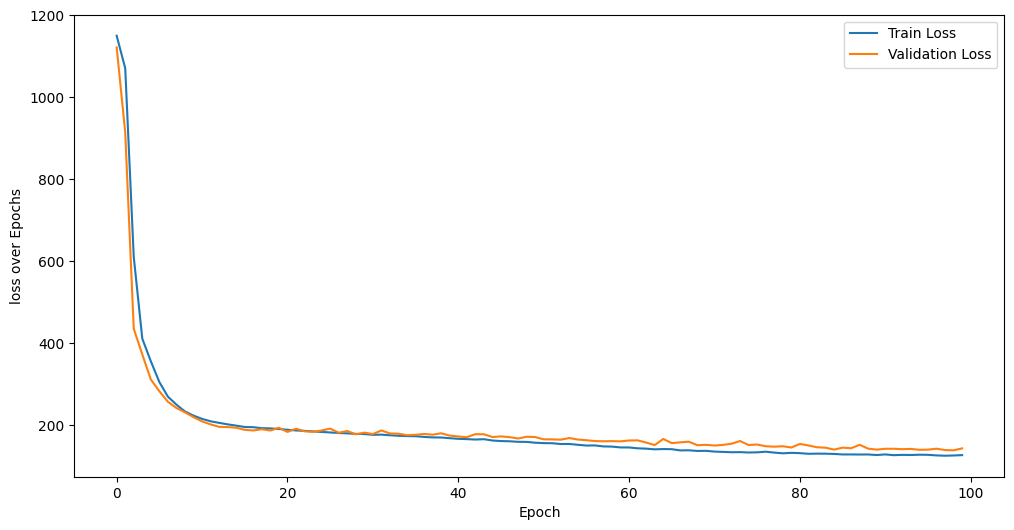

In [51]:
plt.figure(figsize=(12,6))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.ylabel("loss over Epochs")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# Step 6: Make prediction of new data

In [52]:
# Predicting the test dataset
model.eval()
pred_val = []
target_val = []

with torch.inference_mode():
  for x_test, y_test in test_loader:
    y_test_pred = model(x_test)
    pred_val.append(y_test_pred)
    target_val.append(y_test)

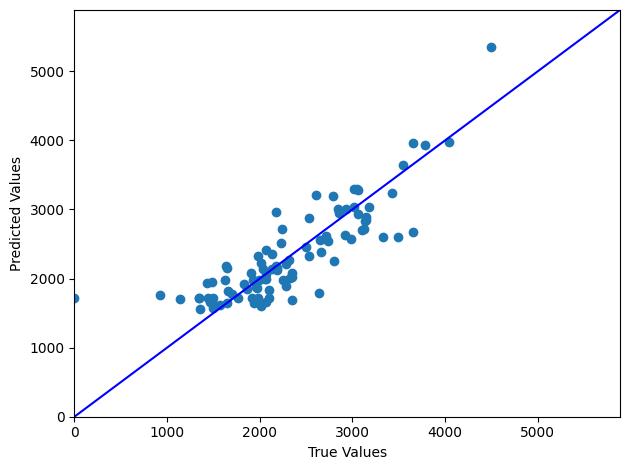

In [53]:
labels = torch.cat(target_val).flatten().tolist()
predictions = torch.cat(pred_val).flatten().tolist()

plt.scatter(labels, predictions)

max_lim = max(max(predictions), max(labels))
max_lim += max_lim * 0.1

plt.xlim(0, max_lim)
plt.ylim(0, max_lim)

plt.plot([0,max_lim], [0,max_lim], "b-")

plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.tight_layout()